In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
from keras.utils import to_categorical
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
import itertools
from sklearn.metrics import confusion_matrix, accuracy_score
from keras.layers import BatchNormalization, Activation
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input
from tensorflow.keras.applications import MobileNetV2
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.applications import VGG16

In [ ]:
#load dataset
data = np.load('/content/ORL_faces.npz')

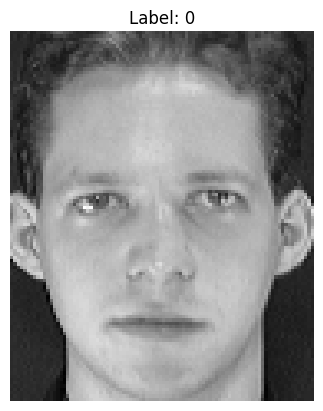

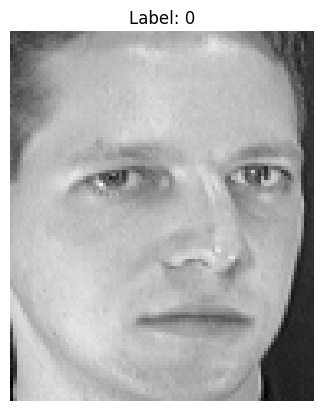

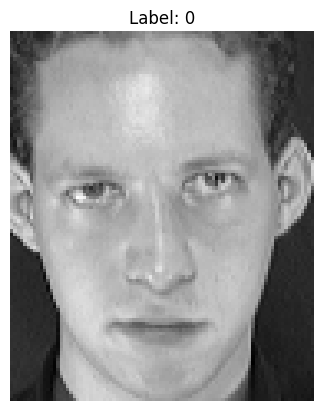

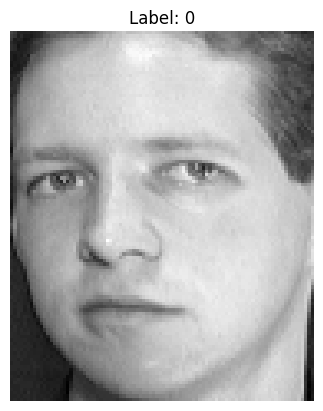

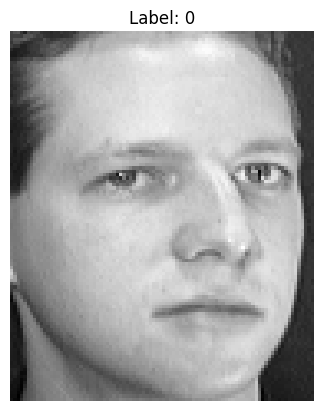

In [ ]:
# Extract training images and labels
train_images = data['trainX']
train_labels = data['trainY']

# Display a few example images with their corresponding labels
num_images_to_display = 5
for i in range(num_images_to_display):
    plt.imshow(train_images[i].reshape(112, 92), cmap='gray')
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')
    plt.show()

In [ ]:
# load the "Train Images"
x_train = data['trainX']
#normalize every image
x_train = np.array(x_train,dtype='float32')/255

x_test = data['testX']
x_test = np.array(x_test,dtype='float32')/255

# load the Label of Images
y_train= data['trainY']
y_test= data['testY']

In [ ]:
x_train, x_valid, y_train, y_valid= train_test_split(
    x_train, y_train, test_size=.05, random_state=1234,)

In [ ]:
im_rows=112
im_cols=92
batch_size=512
im_shape=(im_rows, im_cols, 1)

x_train = x_train.reshape(x_train.shape[0], *im_shape)
x_test = x_test.reshape(x_test.shape[0], *im_shape)
x_valid = x_valid.reshape(x_valid.shape[0], *im_shape)

print('x_train shape: {}'.format(y_train.shape[0]))
print('x_test shape: {}'.format(y_test.shape))

x_train shape: 228
x_test shape: (160,)


In [ ]:
cnn_model= Sequential([
    Conv2D(filters=36, kernel_size=7, activation='relu', input_shape= im_shape),
    MaxPooling2D(pool_size=2),
    Conv2D(filters=54, kernel_size=5, activation='relu', input_shape= im_shape),
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dense(2024, activation='relu'),
     Dropout(0.5),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(20, activation='softmax')
])

cnn_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(lr=0.0001),
    metrics=['accuracy'])

In [ ]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 106, 86, 36)       1800      
                                                                 
 max_pooling2d (MaxPooling2  (None, 53, 43, 36)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 49, 39, 54)        48654     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 24, 19, 54)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 24624)             0         
                                                                 
 dense (Dense)               (None, 2024)              4

In [ ]:
#Model Fitting
history=cnn_model.fit(
    np.array(x_train), np.array(y_train), batch_size=512,
    epochs=250, verbose=2,
    validation_data=(np.array(x_valid),np.array(y_valid)),)

Epoch 1/250
1/1 - 20s - loss: 3.0077 - accuracy: 0.0439 - val_loss: 3.1504 - val_accuracy: 0.0000e+00 - 20s/epoch - 20s/step
Epoch 2/250
1/1 - 10s - loss: 3.8569 - accuracy: 0.0702 - val_loss: 2.9926 - val_accuracy: 0.0000e+00 - 10s/epoch - 10s/step
Epoch 3/250
1/1 - 9s - loss: 3.2416 - accuracy: 0.0702 - val_loss: 2.9666 - val_accuracy: 0.0000e+00 - 9s/epoch - 9s/step
Epoch 4/250
1/1 - 9s - loss: 3.0418 - accuracy: 0.0263 - val_loss: 2.9922 - val_accuracy: 0.0000e+00 - 9s/epoch - 9s/step
Epoch 5/250
1/1 - 9s - loss: 2.9973 - accuracy: 0.0526 - val_loss: 2.9944 - val_accuracy: 0.0000e+00 - 9s/epoch - 9s/step
Epoch 6/250
1/1 - 10s - loss: 2.9905 - accuracy: 0.0658 - val_loss: 2.9979 - val_accuracy: 0.0000e+00 - 10s/epoch - 10s/step
Epoch 7/250
1/1 - 8s - loss: 2.9905 - accuracy: 0.0570 - val_loss: 3.0050 - val_accuracy: 0.0000e+00 - 8s/epoch - 8s/step
Epoch 8/250
1/1 - 9s - loss: 2.9904 - accuracy: 0.0658 - val_loss: 3.0071 - val_accuracy: 0.0000e+00 - 9s/epoch - 9s/step
Epoch 9/250
1/1

In [ ]:
scor = cnn_model.evaluate( np.array(x_test),  np.array(y_test), verbose=0)

print('test los {:.4f}'.format(scor[0]))
print('test acc {:.4f}'.format(scor[1]))

test los 0.5937
test acc 0.9375


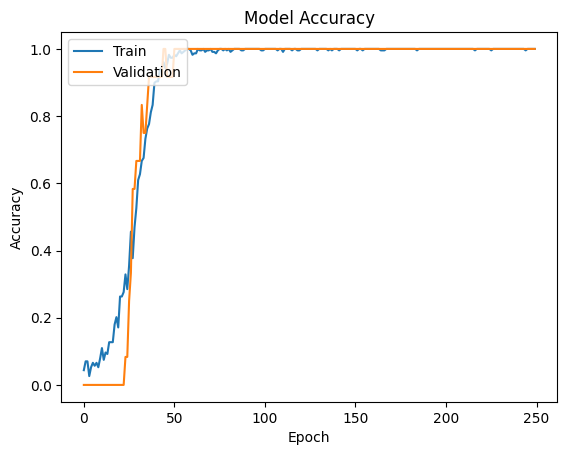

In [ ]:
#Model Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

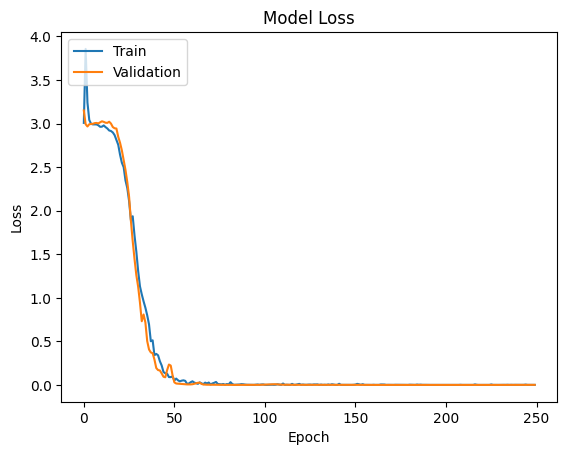

In [ ]:
# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

5/5 [==============================] - 2s 306ms/step


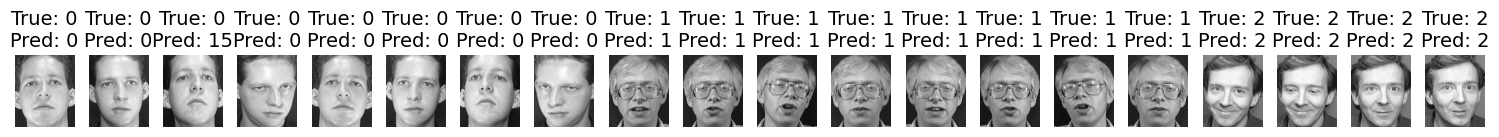

Accuracy: 0.9375
Confusion matrix, without normalization


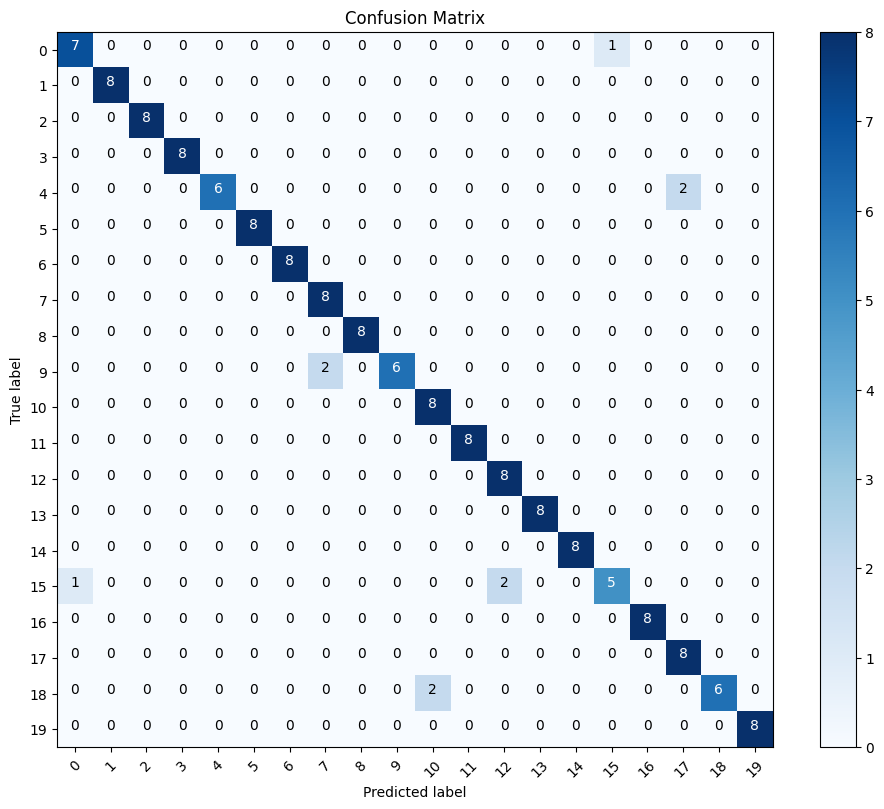

In [ ]:
# Predict labels for test set
predicted_probs = cnn_model.predict(x_test)
y_pred = np.argmax(predicted_probs, axis=1)

# Set figure size
plt.figure(figsize=(15, 8))

# Display a few example images with their corresponding labels and predictions
num_images_to_display = 20  # Change this value to display more or fewer images
for i in range(num_images_to_display):
    plt.subplot(2, num_images_to_display, i+1)
    plt.imshow(x_test[i].reshape(112, 92), cmap='gray')
    plt.title(f"True: {y_test[i]}\nPred: {y_pred[i]}", fontsize=14)
    plt.axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
cnf_matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cnf_matrix, classes=range(20), title='Confusion Matrix', normalize=False)


In [ ]:
#shape post split of data
x_train.shape, x_valid.shape

((228, 112, 92, 1), (12, 112, 92, 1))

# **Facenet Model**

In [ ]:

x_train_rgb = np.repeat(x_train, 3, axis=-1)
x_valid_rgb = np.repeat(x_valid, 3, axis=-1)
x_test_rgb = np.repeat(x_test, 3, axis=-1)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(im_rows, im_cols, 3))
base_model.trainable = False
x = Flatten()(base_model.output)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(20, activation='softmax')(x)
facenet_model = Model(inputs=base_model.input, outputs=predictions)
facenet_model.compile(loss='sparse_categorical_crossentropy',
                      optimizer=Adam(lr=0.0001),
                      metrics=['accuracy'])
history = facenet_model.fit(np.array(x_train_rgb), np.array(y_train),
                             batch_size=512,
                             epochs=50,
                             verbose=2,
                             validation_data=(np.array(x_valid_rgb), np.array(y_valid)))

# Evaluate the model on the test data
evaluation = facenet_model.evaluate(np.array(x_test_rgb), np.array(y_test))

# Print the evaluation results
print("Test Loss:", evaluation[0])
print("Test Accuracy:", evaluation[1])


9406464/9406464 [==============================] - 1s 0us/step


Epoch 1/50
1/1 - 8s - loss: 5.6141 - accuracy: 0.0658 - val_loss: 14.0200 - val_accuracy: 0.5000 - 8s/epoch - 8s/step
Epoch 2/50
1/1 - 3s - loss: 11.4081 - accuracy: 0.3860 - val_loss: 9.6834 - val_accuracy: 0.3333 - 3s/epoch - 3s/step
Epoch 3/50
1/1 - 3s - loss: 5.8353 - accuracy: 0.6272 - val_loss: 3.4618 - val_accuracy: 0.6667 - 3s/epoch - 3s/step
Epoch 4/50
1/1 - 4s - loss: 4.4682 - accuracy: 0.7237 - val_loss: 0.6003 - val_accuracy: 0.8333 - 4s/epoch - 4s/step
Epoch 5/50
1/1 - 3s - loss: 1.1705 - accuracy: 0.8772 - val_loss: 0.3196 - val_accuracy: 0.9167 - 3s/epoch - 3s/step
Epoch 6/50
1/1 - 2s - loss: 0.6484 - accuracy: 0.9123 - val_loss: 0.5679 - val_accuracy: 0.9167 - 2s/epoch - 2s/step
Epoch 7/50
1/1 - 3s - loss: 0.5367 - accuracy: 0.9254 - val_loss: 0.9286 - val_accuracy: 0.9167 - 3s/epoch - 3s/step
Epoch 8/50
1/1 - 4s - loss: 0.6646 - accuracy: 0.8991 - val_loss: 0.0384 - val_accuracy: 1.0000 - 4s/epoch - 4s/step
Epoch 9/50
1/1 - 3s - loss: 0.0806 - accuracy: 0.9825 - val_lo

In [ ]:
evaluation = facenet_model.evaluate(np.array(x_test_rgb), np.array(y_test))
print("Test Loss:", evaluation[0])
print("Test Accuracy:", evaluation[1])

5/5 [==============================] - 1s 261ms/step - loss: 0.5677 - accuracy: 0.9750
Test Loss: 0.5677367448806763
Test Accuracy: 0.9750000238418579


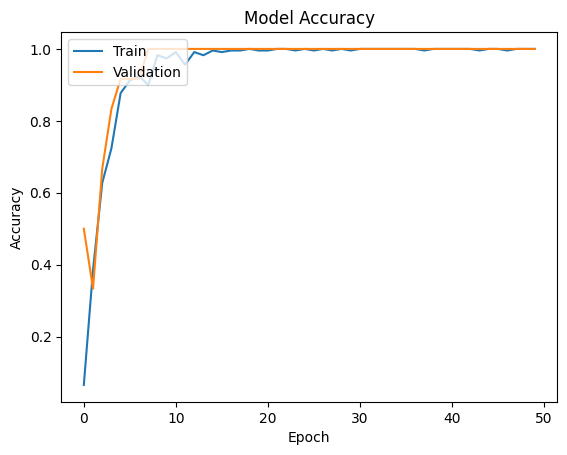

In [ ]:
#Model Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

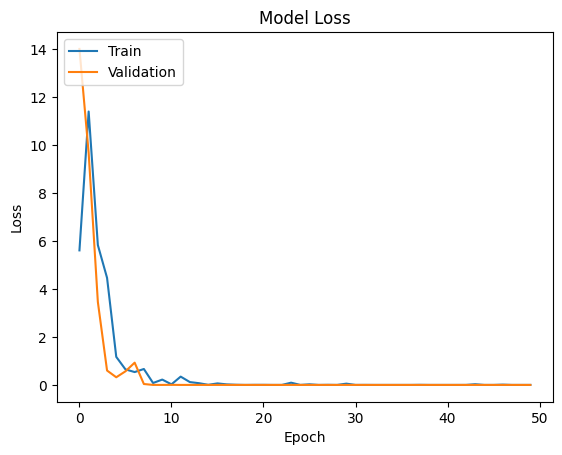

In [ ]:
# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

5/5 [==============================] - 5s 530ms/step


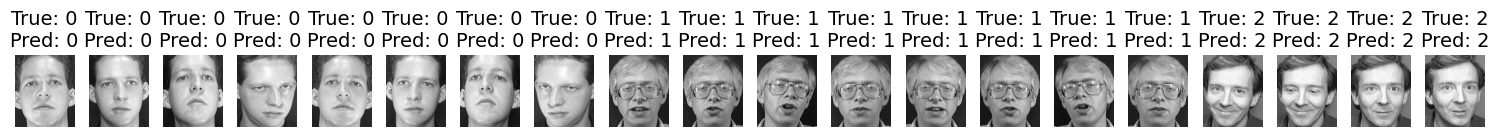

Accuracy: 0.975


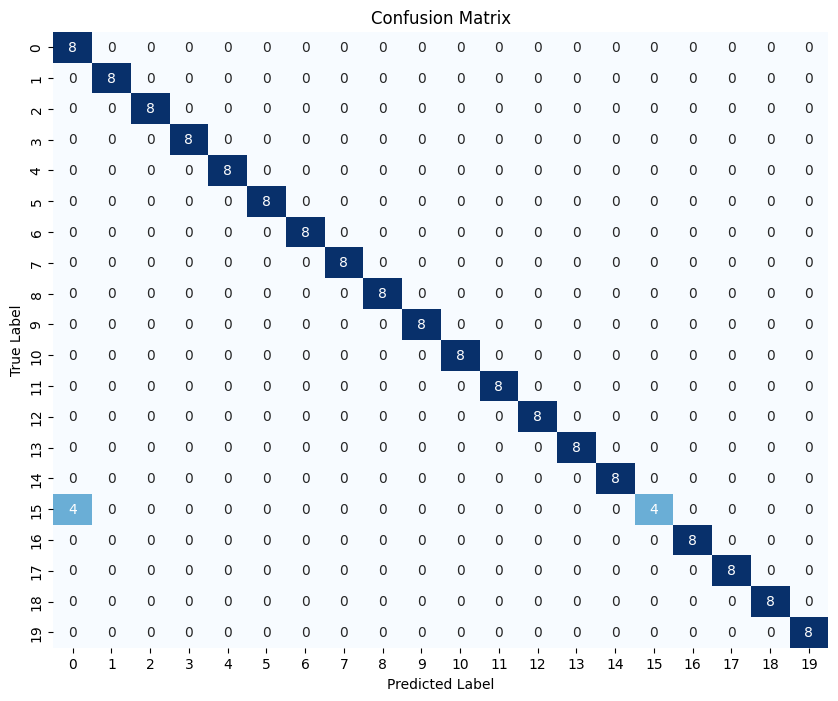

In [ ]:
# Generate predictions
y_pred_probs = facenet_model.predict(np.array(x_test_rgb))
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Set figure size
plt.figure(figsize=(15, 8))

# Display a few example images with their corresponding labels and predictions
num_images_to_display = 20  # Change this value to display more or fewer images
for i in range(num_images_to_display):
    plt.subplot(2, num_images_to_display, i+1)
    plt.imshow(x_test[i].reshape(112, 92), cmap='gray')
    plt.title(f"True: {y_test[i]}\nPred: {y_pred_classes[i]}", fontsize=14)
    plt.axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_classes)
print("Accuracy:", accuracy)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
cnf_matrix = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
